Epoch 1/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2567 - accuracy: 0.9253 - val_loss: 0.1138 - val_accuracy: 0.9695
Epoch 2/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1069 - accuracy: 0.9675 - val_loss: 0.0883 - val_accuracy: 0.9733
Epoch 3/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0741 - accuracy: 0.9764 - val_loss: 0.0804 - val_accuracy: 0.9767
Epoch 4/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0556 - accuracy: 0.9820 - val_loss: 0.0832 - val_accuracy: 0.9770
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9743
               Accuracy  Precision  Recall
Random Forest    0.9704   0.970414  0.9704
SVM              0.9792   0.979201  0.9792
KNN              0.9688   0.969021  0.9688
Naive Bayes      0.5558   0.691726  0.5558
Decision Tree    0.8786   0.878606  0.8786
ANN              0.9743        NaN     NaN


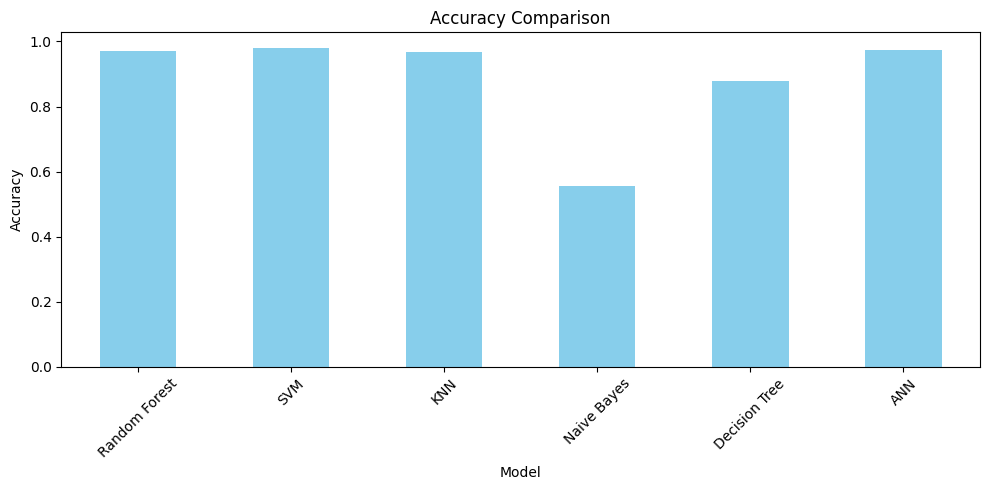

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras import layers, losses
from keras.datasets import mnist
from keras.models import Model

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 2: Train and evaluate each model
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "ANN": None  # ANN will be implemented separately using Keras
}

results = {}

for name, model in models.items():
    if name != "ANN":
        # Train the model
        model.fit(x_train, y_train)

        # Predict labels for test data
        y_pred = model.predict(x_test)

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        # Store results
        results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall}

# Step 3: Train and evaluate ANN
inputs = layers.Input(shape=(28*28,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

ann_model = Model(inputs, outputs)
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the ANN
ann_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the ANN
ann_loss, ann_accuracy = ann_model.evaluate(x_test, y_test)

# Store ANN results
results["ANN"] = {"Accuracy": ann_accuracy, "Precision": None, "Recall": None}

# Step 4: Compare performance
results_df = pd.DataFrame(results).T
print(results_df)

# Step 5: Plotting results (if needed)
plt.figure(figsize=(10, 5))
results_df['Accuracy'].plot(kind='bar', color='skyblue')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
